In [2]:
from tqdm import tnrange, tqdm_notebook
from time import sleep  

In [3]:
for i in tnrange(1, desc='prcessing'):
    sleep(1)

    
    

HBox(children=(IntProgress(value=0, description='prcessing', max=1), HTML(value='')))

In [69]:
import os
import sys
sys.path.insert(0, 'C:\\Users\\Qbit\\Inzynierka')
import Models.Word2vec as w2v
import myTools.moving_commands as mc
import myTools.preprocessingData as pred
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re

import Data.generate_batch as gb
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
mc.move_to_data_location()

In [64]:
os.getcwd()

'C:\\Users\\Qbit\\Inzynierka\\Data'

In [11]:

mc.move_to_main_location()
path_to_train_pos = os.path.abspath(os.path.join(os.path.curdir, "SentimentDataSet", "train","pos"))
path_to_train_neg = os.path.abspath(os.path.join(os.path.curdir, "SentimentDataSet", "train","neg"))
path_to_test_pos = os.path.abspath(os.path.join(os.path.curdir, "SentimentDataSet", "test","pos"))
path_to_test_neg = os.path.abspath(os.path.join(os.path.curdir, "SentimentDataSet", "test","neg"))

train_pos_df = pred.review2pddataframe(path_to_train_pos, 1)

I am in : C:\Users\Qbit\Inzynierka
Changing to:  C:\Users\Qbit\Inzynierka\SentimentDataSet\train\pos


C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Programy\Anaconda3\envs\SentimentProject\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


adding 5000 review out of 12500 : 
 I didn't expect to like this film as much as I did. I got it simply because I saw it on the list of Top 25 Most Controversial Films of All Time. It didn't look particularly great. I was pleasantly surprised to find that it was one of the most cleverly composed films of recent memory.It's about a twenty-year-old woman wants to know everything. She stores every bit of information she collects in an enormous archive. She experiments with experience in sex, political activism, and human relationships. Meanwhile, film's crew is shown making the film and we view their reactions to the story and each other. Nudity, explicit sex, and controversial politics kept this film from being shown in the US while its seizure by Customs was appealed. The film is a narrative yet it's a documentary that shows us the behind-the- scenes world of the filmmakers during the narrative, the fourth wall being broken. This film is the most direct possible way of making a movie I 

In [14]:
train_neg_df = pred.review2pddataframe(path_to_train_neg, 0)

I am in : C:\Users\Qbit\Inzynierka
Changing to:  C:\Users\Qbit\Inzynierka\SentimentDataSet\train\neg


C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Programy\Anaconda3\envs\SentimentProject\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


adding 5000 review out of 12500 : 
 Worst mistake of my life.I picked this movie up at Target for $5 because I figured, "Hey, it's Sandler I can get some cheap laughs". I was wrong, completely wrong. Mid-way through the film all three of my friends were asleep and I was still suffering. Worst plot, Worst script, Worst movie I have ever seen. I wanted to hit my head up against a wall for an hour, then I'd stop, and you know why? Because it felt damn good. Upon bashing my head in i stuck that damn movie in the microwave and watched it burn....and that felt better than anything else I've ever done. It took American Psycho, Army of Darkness, and Kill Bill just to get over that crap. I HATE YOU SANDLER FOR ACTUALLY GOING THROUGH WITH THIS AND RUINING A WHOLE DAY OF MY LIFE!!!!!!!!!!!!!!!!!
adding 10000 review out of 12500 : 
 This movie was the worst movie ever made on the planet, I like BARNEY more than this movie. The graphics suck, half the movie is animated, the deaths suck, and over al

In [16]:
test_pos_df = pred.review2pddataframe(path_to_test_pos, 1)

I am in : C:\Users\Qbit\Inzynierka
Changing to:  C:\Users\Qbit\Inzynierka\SentimentDataSet\test\pos


C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Programy\Anaconda3\envs\SentimentProject\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


adding 5000 review out of 12500 : 
 Mani sir as usual brings out another amazing story with Kannathil Muthamittal. Such an amazing relationship between parents and child is brought out in a beautiful fashion. Mani Sir as usual without much special effects and not much outdoor shoots.(In fact this was the only movie where he went outside India ever..that too just to sri lanka).Mani's class is written all over the movie...and to add to it ARR's music..which is just amazing...Vellai Pookal is one of my most fav songs ever... Maddy,who is what he is in the film industry has impressed a lot too. Starting from alaipayuthey ,to kannathil to ayutha ezuthu to guru.. Mani ratnam has showed to the world what a versatile actor Maddy is. Simran has been really good too. She has showed that she can act too in non-glamorous and character roles. In all an amazing movie. Sad that the tamil public could not appreciate this gr8 movie and it bombed at the box-office....
adding 10000 review out of 12500 : 

In [17]:

test_neg_df = pred.review2pddataframe(path_to_test_neg, 0)

I am in : C:\Users\Qbit\Inzynierka
Changing to:  C:\Users\Qbit\Inzynierka\SentimentDataSet\test\neg


C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Programy\Anaconda3\envs\SentimentProject\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


adding 5000 review out of 12500 : 
 In Halloween, three friends seek an ancient cemetery in the suburb for fun and remove a cross from a tomb, where Jack-O was buried many years ago by the farmer Arthur Kelly. The evil creature is unleashed, kills the trio and seeks the descendants of the Kelly family for revenge.The cheesy "Jack-O" is a combination of a terrible story with awful acting. I was curious with the name of John Carradine in the credits and I can not imagine how a relative authorizes the use of archive footage in such a bad movie, showing a total lack of respect with the name of this great actor. It is impressive how bad the acting is, shifting the film to a comedy instead of the proposed horror genre. This is the type of movie good to see with a group of friends, drinking beer, making comments and laughing a lot. My vote is three.Title (Brazil): "Jack-O  Demônio do Halloween" ("Jack-O  Demon of the Halloween")
adding 10000 review out of 12500 : 
 Even in her glasses weari

In [18]:
data = [test_neg_df, train_neg_df, test_pos_df, train_pos_df]

In [19]:
data = pd.concat(data)

In [20]:
data = data.sample(frac=1).reset_index(drop=True)

In [21]:
mc.move_to_data_location()
os.getcwd()

'C:\\Users\\Qbit\\Inzynierka\\Data'

In [24]:
data.to_csv('all_data_before_processing.csv',encoding="utf-8", index=False)


Text(0,0.5,'Count')

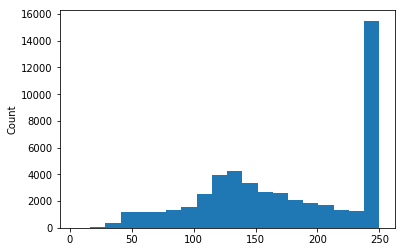

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(number_of_words, bins=20)
plt.ylabel('Count')



In [92]:

word_list, word_vectors = w2v.load_word_list_and_words_vectors('300f_40minw_10window')



## creating w2v_model based on all sentences from unlabelled, test and train  



In [114]:
mc.move_to_data_location()
os.getcwd()

all_not_pred_data = pd.read_csv('all_data_before_processing.csv')

In [143]:
os.getcwd()
all_not_pred_data['review'][0]

"There are some things I can never understand. Such as this movie. What if I were to create a really really cheap and crappy looking Dino and crocodile polygon model in Maya and then proceed to cut and paste that into an amateur video clip having people scream and getting eaten by the same thing? How can anyone even believe that an utterly fake CGI dinocroc that looks completely out of place, would influence the events in this movie? I know that its B-grade, low budget and all but the producers could do better than making a piece of crap that no one will ever seen see or sit through. It just does'nt make sense. Are people really so stupid that they would sit through this? Apparently so. For laughs? No, this thing isn't even worth laughing at."

In [140]:
def preprocessing_reviews_in_df_to_setences(all_not_pred_data):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    reviews = all_not_pred_data['review'].as_matrix().tolist()
    reviews_sentences =[tokenizer.tokenize(review.strip()) for review in reviews]
    clean = lambda x: re.sub('[^a-zA-Z1-9\s]', '', x)
    lower_split = lambda x: x.lower().split()
    clean_sentences = [list(map(clean, reviews_sentences[i])) for i in range(len(reviews_sentences))]
    to_low_split_sentences = [list(map(lower_split, clean_sentences[i])) for i in range(len(clean_sentences))]
    sentences = [sentence for review in to_low_split_sentences for sentence in review]
    pred.write_list_of_lists_to_csv(sentences, 'all_labeled_data_sentences.csv')
    return sentences 
    

In [141]:
labeled_sentences = preprocessing_reviews_in_df_to_setences(all_not_pred_data)

.... Writing data to all_labeled_data_sentences.csv ....
DONE


In [149]:
labeled_sentences[0]

['there', 'are', 'some', 'things', 'i', 'can', 'never', 'understand']

In [145]:
test = pred.read_csv_to_list_of_lists('all_labeled_data_sentences.csv')

.... Reading data from all_labeled_data_sentences.csv ....
DONE


In [146]:
test[0]

['there', 'are', 'some', 'things', 'i', 'can', 'never', 'understand']

In [129]:
to_low_split_sentences[0]

[['there', 'are', 'some', 'things', 'i', 'can', 'never', 'understand'],
 ['such', 'as', 'this', 'movie'],
 ['what',
  'if',
  'i',
  'were',
  'to',
  'create',
  'a',
  'really',
  'really',
  'cheap',
  'and',
  'crappy',
  'looking',
  'dino',
  'and',
  'crocodile',
  'polygon',
  'model',
  'in',
  'maya',
  'and',
  'then',
  'proceed',
  'to',
  'cut',
  'and',
  'paste',
  'that',
  'into',
  'an',
  'amateur',
  'video',
  'clip',
  'having',
  'people',
  'scream',
  'and',
  'getting',
  'eaten',
  'by',
  'the',
  'same',
  'thing'],
 ['how',
  'can',
  'anyone',
  'even',
  'believe',
  'that',
  'an',
  'utterly',
  'fake',
  'cgi',
  'dinocroc',
  'that',
  'looks',
  'completely',
  'out',
  'of',
  'place',
  'would',
  'influence',
  'the',
  'events',
  'in',
  'this',
  'movie'],
 ['i',
  'know',
  'that',
  'its',
  'bgrade',
  'low',
  'budget',
  'and',
  'all',
  'but',
  'the',
  'producers',
  'could',
  'do',
  'better',
  'than',
  'making',
  'a',
  'piece'

In [ ]:
lower_sentences = list(map(to_lower, clean_sentences))


In [74]:
lower_sentences

NameError: name 'lower_sentences' is not defined

In [67]:
sentences.shape

(50000,)

In [151]:
labelled_data, unlabelled_data = pred.gather_sentiment_data_set()

I am in : C:\Users\Qbit\Inzynierka
Changing to:  C:\Users\Qbit\Inzynierka\SentimentDataSet\train\pos


C:\Programy\Anaconda3\envs\SentimentProject\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Programy\Anaconda3\envs\SentimentProject\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


adding 5000 review out of 12500 : 
 I didn't expect to like this film as much as I did. I got it simply because I saw it on the list of Top 25 Most Controversial Films of All Time. It didn't look particularly great. I was pleasantly surprised to find that it was one of the most cleverly composed films of recent memory.It's about a twenty-year-old woman wants to know everything. She stores every bit of information she collects in an enormous archive. She experiments with experience in sex, political activism, and human relationships. Meanwhile, film's crew is shown making the film and we view their reactions to the story and each other. Nudity, explicit sex, and controversial politics kept this film from being shown in the US while its seizure by Customs was appealed. The film is a narrative yet it's a documentary that shows us the behind-the- scenes world of the filmmakers during the narrative, the fourth wall being broken. This film is the most direct possible way of making a movie I 

 OK this film has virtually no budget for a sci-fi movie and no real stars to speak of other than Peter 'Robocop' Weller but that doesn't matter because what it does have is a good story well told. It's a shame that bigger budget sci-fi productions never seem to remember that sci-fi should be have an interesting premise and not just throw a few explosions at the screen every few minutes.What is on offer in Screamers is a solidly entertaining 1hr 40mins of sci fi fun, reasonable acting and a great story based on a Phillip K Dick short. The main idea of screamers is a very scary one a war that had been taken over by machines that fight on our behalf a war that can't be stopped.For sci-fi fans this is a must see, for everyone else it's still solidly entertaining 7/10
adding 30000 review out of 50000 : 
 I saw this on cable last night, just 2 days after seeing the Sprecher sisters' latest film, 13 Conversations About One Thing - that was the reason I stayed up til 2:30 a.m. to watch it, in

In [164]:
labelled_data

,review,rating,sentiment
0,An assassination thriller in the mould of Day ...,7,1
1,"If Jean Renoir's first film ""Whirlpool of Fate...",7,1
2,Pokemon 3 is little more than three or four ep...,3,0
3,This is the definitive movie version of Hamlet...,10,1
4,I think this movie had really bad production v...,2,0
5,Hello all! I went to this movie without any ex...,10,1
6,"Ben Marshall, a teen ager from a religious bac...",7,1
7,"One of the problems with popular culture, espe...",3,0
8,"""All the world's a stage and its people actors...",10,1
9,I caught this movie the other night on one of ...,9,1


In [155]:
labelled_sentences = pred.preprocessing_reviews_in_df_to_sentences(labelled_data, 'all_labelled_sentences.csv')
print(len(labelled_sentences))
unlabelled_sentences = pred.preprocessing_reviews_in_df_to_sentences(unlabelled_data, 'all_unlabelled_sentences.csv')
print(len(unlabelled_sentences))

.... Writing data to all_labelled_sentences.csv ....
DONE
538714
.... Writing data to all_unlabelled_sentences.csv ....
DONE
539897


## creating corpus

In [156]:
all_sentences = labelled_sentences + unlabelled_sentences

In [157]:
len(all_sentences)

1078611

In [70]:
clean_sentences = clean(sentences)

TypeError: expected string or bytes-like object

In [29]:
sentences = pred.preprocessing_reviews_in_df_to_sentences(all_not_pred_data)
sentences

HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

ValueError: setting an array element with a sequence

In [18]:
pred.preprocessing_reviews_in_df_to_sentences(all_not_pred_data, 'test_train_dev_sentences')

HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

KeyError: 'review'

In [14]:
unsup_sentences = pd.read_csv('unsup_data_sentences.csv', error_bad_lines=False)

b'Skipping line 8: expected 36 fields, saw 43\nSkipping line 33: expected 36 fields, saw 37\nSkipping line 121: expected 36 fields, saw 64\nSkipping line 122: expected 36 fields, saw 52\nSkipping line 181: expected 36 fields, saw 38\nSkipping line 350: expected 36 fields, saw 53\nSkipping line 384: expected 36 fields, saw 48\nSkipping line 400: expected 36 fields, saw 39\nSkipping line 423: expected 36 fields, saw 39\nSkipping line 425: expected 36 fields, saw 39\nSkipping line 550: expected 36 fields, saw 77\nSkipping line 566: expected 36 fields, saw 45\nSkipping line 639: expected 36 fields, saw 52\nSkipping line 701: expected 36 fields, saw 55\nSkipping line 716: expected 36 fields, saw 60\nSkipping line 725: expected 36 fields, saw 39\nSkipping line 780: expected 36 fields, saw 86\nSkipping line 781: expected 36 fields, saw 57\nSkipping line 782: expected 36 fields, saw 49\nSkipping line 867: expected 36 fields, saw 40\nSkipping line 941: expected 36 fields, saw 43\nSkipping line 


b'Skipping line 16827: expected 36 fields, saw 55\nSkipping line 16851: expected 36 fields, saw 39\nSkipping line 16887: expected 36 fields, saw 39\nSkipping line 16897: expected 36 fields, saw 90\nSkipping line 16899: expected 36 fields, saw 80\nSkipping line 16908: expected 36 fields, saw 41\nSkipping line 17039: expected 36 fields, saw 89\nSkipping line 17178: expected 36 fields, saw 53\nSkipping line 17215: expected 36 fields, saw 59\nSkipping line 17218: expected 36 fields, saw 49\nSkipping line 17220: expected 36 fields, saw 52\nSkipping line 17265: expected 36 fields, saw 46\nSkipping line 17276: expected 36 fields, saw 43\nSkipping line 17284: expected 36 fields, saw 38\nSkipping line 17300: expected 36 fields, saw 39\nSkipping line 17387: expected 36 fields, saw 38\nSkipping line 17399: expected 36 fields, saw 37\nSkipping line 17470: expected 36 fields, saw 37\nSkipping line 17478: expected 36 fields, saw 44\nSkipping line 17519: expected 36 fields, saw 39\nSkipping line 175

b'Skipping line 33546: expected 36 fields, saw 69\nSkipping line 33617: expected 36 fields, saw 44\nSkipping line 33652: expected 36 fields, saw 46\nSkipping line 33657: expected 36 fields, saw 45\nSkipping line 33660: expected 36 fields, saw 38\nSkipping line 33768: expected 36 fields, saw 47\nSkipping line 33806: expected 36 fields, saw 44\nSkipping line 33807: expected 36 fields, saw 38\nSkipping line 33808: expected 36 fields, saw 60\nSkipping line 33815: expected 36 fields, saw 42\nSkipping line 33831: expected 36 fields, saw 38\nSkipping line 33845: expected 36 fields, saw 48\nSkipping line 33925: expected 36 fields, saw 39\nSkipping line 34050: expected 36 fields, saw 56\nSkipping line 34066: expected 36 fields, saw 60\nSkipping line 34093: expected 36 fields, saw 44\nSkipping line 34094: expected 36 fields, saw 48\nSkipping line 34145: expected 36 fields, saw 46\nSkipping line 34258: expected 36 fields, saw 42\nSkipping line 34319: expected 36 fields, saw 89\nSkipping line 3432


b'Skipping line 50249: expected 36 fields, saw 69\nSkipping line 50254: expected 36 fields, saw 48\nSkipping line 50310: expected 36 fields, saw 70\nSkipping line 50327: expected 36 fields, saw 48\nSkipping line 50331: expected 36 fields, saw 64\nSkipping line 50447: expected 36 fields, saw 37\nSkipping line 50452: expected 36 fields, saw 39\nSkipping line 50453: expected 36 fields, saw 40\nSkipping line 50480: expected 36 fields, saw 41\nSkipping line 50511: expected 36 fields, saw 41\nSkipping line 50530: expected 36 fields, saw 47\nSkipping line 50531: expected 36 fields, saw 40\nSkipping line 50550: expected 36 fields, saw 38\nSkipping line 50553: expected 36 fields, saw 46\nSkipping line 50604: expected 36 fields, saw 37\nSkipping line 50605: expected 36 fields, saw 123\nSkipping line 50662: expected 36 fields, saw 62\nSkipping line 50806: expected 36 fields, saw 37\nSkipping line 50871: expected 36 fields, saw 45\nSkipping line 50878: expected 36 fields, saw 44\nSkipping line 50

b'Skipping line 66989: expected 36 fields, saw 51\nSkipping line 67013: expected 36 fields, saw 39\nSkipping line 67017: expected 36 fields, saw 38\nSkipping line 67044: expected 36 fields, saw 37\nSkipping line 67119: expected 36 fields, saw 40\nSkipping line 67162: expected 36 fields, saw 42\nSkipping line 67257: expected 36 fields, saw 50\nSkipping line 67304: expected 36 fields, saw 100\nSkipping line 67307: expected 36 fields, saw 40\nSkipping line 67534: expected 36 fields, saw 49\nSkipping line 67551: expected 36 fields, saw 42\nSkipping line 67555: expected 36 fields, saw 37\nSkipping line 67564: expected 36 fields, saw 104\nSkipping line 67569: expected 36 fields, saw 42\nSkipping line 67573: expected 36 fields, saw 44\nSkipping line 67586: expected 36 fields, saw 58\nSkipping line 67733: expected 36 fields, saw 41\nSkipping line 67764: expected 36 fields, saw 37\nSkipping line 67867: expected 36 fields, saw 58\nSkipping line 67919: expected 36 fields, saw 38\nSkipping line 67


b'Skipping line 83748: expected 36 fields, saw 45\nSkipping line 83758: expected 36 fields, saw 37\nSkipping line 83778: expected 36 fields, saw 37\nSkipping line 83784: expected 36 fields, saw 59\nSkipping line 83794: expected 36 fields, saw 37\nSkipping line 83797: expected 36 fields, saw 58\nSkipping line 83864: expected 36 fields, saw 40\nSkipping line 83883: expected 36 fields, saw 146\nSkipping line 83884: expected 36 fields, saw 53\nSkipping line 83885: expected 36 fields, saw 40\nSkipping line 83886: expected 36 fields, saw 39\nSkipping line 83904: expected 36 fields, saw 41\nSkipping line 83920: expected 36 fields, saw 61\nSkipping line 83924: expected 36 fields, saw 38\nSkipping line 83925: expected 36 fields, saw 69\nSkipping line 83941: expected 36 fields, saw 43\nSkipping line 83989: expected 36 fields, saw 44\nSkipping line 83998: expected 36 fields, saw 40\nSkipping line 84014: expected 36 fields, saw 44\nSkipping line 84046: expected 36 fields, saw 38\nSkipping line 84

b'Skipping line 100555: expected 36 fields, saw 37\nSkipping line 100563: expected 36 fields, saw 38\nSkipping line 100564: expected 36 fields, saw 78\nSkipping line 100608: expected 36 fields, saw 37\nSkipping line 100631: expected 36 fields, saw 37\nSkipping line 100641: expected 36 fields, saw 40\nSkipping line 100718: expected 36 fields, saw 39\nSkipping line 100721: expected 36 fields, saw 58\nSkipping line 100723: expected 36 fields, saw 45\nSkipping line 100725: expected 36 fields, saw 51\nSkipping line 100738: expected 36 fields, saw 53\nSkipping line 100756: expected 36 fields, saw 41\nSkipping line 100757: expected 36 fields, saw 47\nSkipping line 100829: expected 36 fields, saw 96\nSkipping line 100830: expected 36 fields, saw 43\nSkipping line 100904: expected 36 fields, saw 52\nSkipping line 100994: expected 36 fields, saw 47\nSkipping line 101044: expected 36 fields, saw 38\nSkipping line 101058: expected 36 fields, saw 51\nSkipping line 101060: expected 36 fields, saw 50


b'Skipping line 117320: expected 36 fields, saw 51\nSkipping line 117384: expected 36 fields, saw 71\nSkipping line 117385: expected 36 fields, saw 40\nSkipping line 117454: expected 36 fields, saw 48\nSkipping line 117487: expected 36 fields, saw 67\nSkipping line 117568: expected 36 fields, saw 41\nSkipping line 117599: expected 36 fields, saw 45\nSkipping line 117633: expected 36 fields, saw 44\nSkipping line 117793: expected 36 fields, saw 38\nSkipping line 117801: expected 36 fields, saw 47\nSkipping line 117803: expected 36 fields, saw 68\nSkipping line 117874: expected 36 fields, saw 64\nSkipping line 117882: expected 36 fields, saw 39\nSkipping line 117885: expected 36 fields, saw 40\nSkipping line 117900: expected 36 fields, saw 38\nSkipping line 117915: expected 36 fields, saw 47\nSkipping line 117980: expected 36 fields, saw 42\nSkipping line 117984: expected 36 fields, saw 53\nSkipping line 118045: expected 36 fields, saw 44\nSkipping line 118085: expected 36 fields, saw 5

b'Skipping line 134034: expected 36 fields, saw 41\nSkipping line 134058: expected 36 fields, saw 52\nSkipping line 134079: expected 36 fields, saw 46\nSkipping line 134081: expected 36 fields, saw 37\nSkipping line 134082: expected 36 fields, saw 69\nSkipping line 134085: expected 36 fields, saw 41\nSkipping line 134091: expected 36 fields, saw 45\nSkipping line 134300: expected 36 fields, saw 52\nSkipping line 134345: expected 36 fields, saw 42\nSkipping line 134455: expected 36 fields, saw 56\nSkipping line 134457: expected 36 fields, saw 53\nSkipping line 134515: expected 36 fields, saw 136\nSkipping line 134685: expected 36 fields, saw 45\nSkipping line 134718: expected 36 fields, saw 64\nSkipping line 134729: expected 36 fields, saw 52\nSkipping line 134831: expected 36 fields, saw 43\nSkipping line 134864: expected 36 fields, saw 84\nSkipping line 134866: expected 36 fields, saw 37\nSkipping line 134973: expected 36 fields, saw 138\nSkipping line 134984: expected 36 fields, saw 


b'Skipping line 150706: expected 36 fields, saw 53\nSkipping line 150709: expected 36 fields, saw 42\nSkipping line 150710: expected 36 fields, saw 68\nSkipping line 150753: expected 36 fields, saw 58\nSkipping line 150769: expected 36 fields, saw 56\nSkipping line 150798: expected 36 fields, saw 38\nSkipping line 150805: expected 36 fields, saw 45\nSkipping line 150817: expected 36 fields, saw 43\nSkipping line 150881: expected 36 fields, saw 50\nSkipping line 150939: expected 36 fields, saw 58\nSkipping line 151024: expected 36 fields, saw 53\nSkipping line 151036: expected 36 fields, saw 53\nSkipping line 151170: expected 36 fields, saw 57\nSkipping line 151235: expected 36 fields, saw 52\nSkipping line 151266: expected 36 fields, saw 41\nSkipping line 151300: expected 36 fields, saw 41\nSkipping line 151301: expected 36 fields, saw 39\nSkipping line 151331: expected 36 fields, saw 38\nSkipping line 151360: expected 36 fields, saw 56\nSkipping line 151362: expected 36 fields, saw 5

b'Skipping line 167544: expected 36 fields, saw 48\nSkipping line 167547: expected 36 fields, saw 39\nSkipping line 167615: expected 36 fields, saw 57\nSkipping line 167628: expected 36 fields, saw 47\nSkipping line 167629: expected 36 fields, saw 56\nSkipping line 167633: expected 36 fields, saw 61\nSkipping line 167646: expected 36 fields, saw 42\nSkipping line 167690: expected 36 fields, saw 119\nSkipping line 167692: expected 36 fields, saw 41\nSkipping line 167768: expected 36 fields, saw 37\nSkipping line 167770: expected 36 fields, saw 51\nSkipping line 167773: expected 36 fields, saw 52\nSkipping line 167775: expected 36 fields, saw 50\nSkipping line 167776: expected 36 fields, saw 44\nSkipping line 167783: expected 36 fields, saw 55\nSkipping line 167828: expected 36 fields, saw 38\nSkipping line 167930: expected 36 fields, saw 47\nSkipping line 167954: expected 36 fields, saw 39\nSkipping line 167956: expected 36 fields, saw 37\nSkipping line 167957: expected 36 fields, saw 6


b'Skipping line 184350: expected 36 fields, saw 39\nSkipping line 184398: expected 36 fields, saw 47\nSkipping line 184526: expected 36 fields, saw 38\nSkipping line 184566: expected 36 fields, saw 95\nSkipping line 184617: expected 36 fields, saw 45\nSkipping line 184624: expected 36 fields, saw 39\nSkipping line 184717: expected 36 fields, saw 37\nSkipping line 184723: expected 36 fields, saw 40\nSkipping line 184806: expected 36 fields, saw 39\nSkipping line 184807: expected 36 fields, saw 40\nSkipping line 184810: expected 36 fields, saw 46\nSkipping line 184815: expected 36 fields, saw 66\nSkipping line 184831: expected 36 fields, saw 55\nSkipping line 184838: expected 36 fields, saw 43\nSkipping line 184842: expected 36 fields, saw 45\nSkipping line 184844: expected 36 fields, saw 43\nSkipping line 184869: expected 36 fields, saw 43\nSkipping line 184901: expected 36 fields, saw 39\nSkipping line 184940: expected 36 fields, saw 63\nSkipping line 185056: expected 36 fields, saw 3

b'Skipping line 201078: expected 36 fields, saw 42\nSkipping line 201089: expected 36 fields, saw 69\nSkipping line 201130: expected 36 fields, saw 41\nSkipping line 201200: expected 36 fields, saw 154\nSkipping line 201201: expected 36 fields, saw 38\nSkipping line 201232: expected 36 fields, saw 39\nSkipping line 201242: expected 36 fields, saw 46\nSkipping line 201244: expected 36 fields, saw 100\nSkipping line 201422: expected 36 fields, saw 44\nSkipping line 201595: expected 36 fields, saw 58\nSkipping line 201626: expected 36 fields, saw 42\nSkipping line 201714: expected 36 fields, saw 64\nSkipping line 201719: expected 36 fields, saw 62\nSkipping line 201753: expected 36 fields, saw 39\nSkipping line 201912: expected 36 fields, saw 60\nSkipping line 202182: expected 36 fields, saw 57\nSkipping line 202195: expected 36 fields, saw 78\nSkipping line 202236: expected 36 fields, saw 38\nSkipping line 202238: expected 36 fields, saw 52\nSkipping line 202274: expected 36 fields, saw 


b'Skipping line 217788: expected 36 fields, saw 46\nSkipping line 217889: expected 36 fields, saw 37\nSkipping line 217891: expected 36 fields, saw 38\nSkipping line 218188: expected 36 fields, saw 54\nSkipping line 218191: expected 36 fields, saw 40\nSkipping line 218211: expected 36 fields, saw 74\nSkipping line 218214: expected 36 fields, saw 38\nSkipping line 218257: expected 36 fields, saw 55\nSkipping line 218618: expected 36 fields, saw 50\nSkipping line 218686: expected 36 fields, saw 53\nSkipping line 218689: expected 36 fields, saw 78\nSkipping line 218698: expected 36 fields, saw 37\nSkipping line 218700: expected 36 fields, saw 43\nSkipping line 218707: expected 36 fields, saw 37\nSkipping line 218717: expected 36 fields, saw 112\nSkipping line 218733: expected 36 fields, saw 43\nSkipping line 218789: expected 36 fields, saw 58\nSkipping line 218798: expected 36 fields, saw 39\nSkipping line 218807: expected 36 fields, saw 38\nSkipping line 218808: expected 36 fields, saw 

b'Skipping line 234474: expected 36 fields, saw 63\nSkipping line 234522: expected 36 fields, saw 127\nSkipping line 234602: expected 36 fields, saw 41\nSkipping line 234614: expected 36 fields, saw 56\nSkipping line 234644: expected 36 fields, saw 41\nSkipping line 234694: expected 36 fields, saw 43\nSkipping line 234762: expected 36 fields, saw 39\nSkipping line 234900: expected 36 fields, saw 47\nSkipping line 234944: expected 36 fields, saw 47\nSkipping line 234969: expected 36 fields, saw 63\nSkipping line 234972: expected 36 fields, saw 44\nSkipping line 234983: expected 36 fields, saw 38\nSkipping line 234984: expected 36 fields, saw 43\nSkipping line 234989: expected 36 fields, saw 70\nSkipping line 235005: expected 36 fields, saw 38\nSkipping line 235033: expected 36 fields, saw 108\nSkipping line 235071: expected 36 fields, saw 53\nSkipping line 235080: expected 36 fields, saw 58\nSkipping line 235085: expected 36 fields, saw 42\nSkipping line 235095: expected 36 fields, saw 


b'Skipping line 251154: expected 36 fields, saw 62\nSkipping line 251228: expected 36 fields, saw 38\nSkipping line 251230: expected 36 fields, saw 37\nSkipping line 251241: expected 36 fields, saw 44\nSkipping line 251242: expected 36 fields, saw 61\nSkipping line 251245: expected 36 fields, saw 37\nSkipping line 251251: expected 36 fields, saw 46\nSkipping line 251254: expected 36 fields, saw 53\nSkipping line 251315: expected 36 fields, saw 42\nSkipping line 251565: expected 36 fields, saw 121\nSkipping line 251608: expected 36 fields, saw 39\nSkipping line 251611: expected 36 fields, saw 61\nSkipping line 251680: expected 36 fields, saw 40\nSkipping line 251786: expected 36 fields, saw 52\nSkipping line 251855: expected 36 fields, saw 40\nSkipping line 251881: expected 36 fields, saw 42\nSkipping line 251885: expected 36 fields, saw 66\nSkipping line 251889: expected 36 fields, saw 74\nSkipping line 251993: expected 36 fields, saw 39\nSkipping line 252005: expected 36 fields, saw 

b'Skipping line 267937: expected 36 fields, saw 47\nSkipping line 267977: expected 36 fields, saw 37\nSkipping line 268027: expected 36 fields, saw 60\nSkipping line 268122: expected 36 fields, saw 51\nSkipping line 268124: expected 36 fields, saw 67\nSkipping line 268131: expected 36 fields, saw 96\nSkipping line 268187: expected 36 fields, saw 45\nSkipping line 268228: expected 36 fields, saw 50\nSkipping line 268293: expected 36 fields, saw 79\nSkipping line 268323: expected 36 fields, saw 41\nSkipping line 268338: expected 36 fields, saw 39\nSkipping line 268339: expected 36 fields, saw 46\nSkipping line 268439: expected 36 fields, saw 46\nSkipping line 268442: expected 36 fields, saw 40\nSkipping line 268475: expected 36 fields, saw 39\nSkipping line 268483: expected 36 fields, saw 48\nSkipping line 268491: expected 36 fields, saw 38\nSkipping line 268520: expected 36 fields, saw 50\nSkipping line 268595: expected 36 fields, saw 86\nSkipping line 268690: expected 36 fields, saw 51


b'Skipping line 284597: expected 36 fields, saw 54\nSkipping line 284627: expected 36 fields, saw 44\nSkipping line 284737: expected 36 fields, saw 62\nSkipping line 284741: expected 36 fields, saw 76\nSkipping line 284817: expected 36 fields, saw 37\nSkipping line 284832: expected 36 fields, saw 40\nSkipping line 284855: expected 36 fields, saw 37\nSkipping line 284866: expected 36 fields, saw 40\nSkipping line 284888: expected 36 fields, saw 39\nSkipping line 284957: expected 36 fields, saw 38\nSkipping line 285006: expected 36 fields, saw 47\nSkipping line 285013: expected 36 fields, saw 53\nSkipping line 285023: expected 36 fields, saw 55\nSkipping line 285032: expected 36 fields, saw 39\nSkipping line 285035: expected 36 fields, saw 42\nSkipping line 285200: expected 36 fields, saw 48\nSkipping line 285214: expected 36 fields, saw 51\nSkipping line 285239: expected 36 fields, saw 51\nSkipping line 285280: expected 36 fields, saw 37\nSkipping line 285288: expected 36 fields, saw 5

b'Skipping line 301445: expected 36 fields, saw 40\nSkipping line 301446: expected 36 fields, saw 57\nSkipping line 301499: expected 36 fields, saw 110\nSkipping line 301501: expected 36 fields, saw 45\nSkipping line 301505: expected 36 fields, saw 45\nSkipping line 301506: expected 36 fields, saw 42\nSkipping line 301510: expected 36 fields, saw 62\nSkipping line 301516: expected 36 fields, saw 56\nSkipping line 301519: expected 36 fields, saw 37\nSkipping line 301524: expected 36 fields, saw 46\nSkipping line 301621: expected 36 fields, saw 44\nSkipping line 301762: expected 36 fields, saw 40\nSkipping line 301763: expected 36 fields, saw 58\nSkipping line 301768: expected 36 fields, saw 55\nSkipping line 301773: expected 36 fields, saw 50\nSkipping line 301856: expected 36 fields, saw 46\nSkipping line 301925: expected 36 fields, saw 76\nSkipping line 301956: expected 36 fields, saw 41\nSkipping line 301966: expected 36 fields, saw 37\nSkipping line 301998: expected 36 fields, saw 4


b'Skipping line 318135: expected 36 fields, saw 57\nSkipping line 318154: expected 36 fields, saw 43\nSkipping line 318160: expected 36 fields, saw 39\nSkipping line 318161: expected 36 fields, saw 39\nSkipping line 318197: expected 36 fields, saw 42\nSkipping line 318217: expected 36 fields, saw 37\nSkipping line 318220: expected 36 fields, saw 52\nSkipping line 318253: expected 36 fields, saw 48\nSkipping line 318338: expected 36 fields, saw 44\nSkipping line 318353: expected 36 fields, saw 37\nSkipping line 318378: expected 36 fields, saw 38\nSkipping line 318397: expected 36 fields, saw 43\nSkipping line 318565: expected 36 fields, saw 74\nSkipping line 318610: expected 36 fields, saw 151\nSkipping line 318743: expected 36 fields, saw 53\nSkipping line 318795: expected 36 fields, saw 38\nSkipping line 318802: expected 36 fields, saw 45\nSkipping line 318835: expected 36 fields, saw 40\nSkipping line 318858: expected 36 fields, saw 44\nSkipping line 318860: expected 36 fields, saw 

b'Skipping line 334876: expected 36 fields, saw 72\nSkipping line 334911: expected 36 fields, saw 39\nSkipping line 334970: expected 36 fields, saw 38\nSkipping line 334983: expected 36 fields, saw 47\nSkipping line 334986: expected 36 fields, saw 42\nSkipping line 334987: expected 36 fields, saw 86\nSkipping line 335115: expected 36 fields, saw 38\nSkipping line 335171: expected 36 fields, saw 43\nSkipping line 335194: expected 36 fields, saw 70\nSkipping line 335216: expected 36 fields, saw 104\nSkipping line 335217: expected 36 fields, saw 50\nSkipping line 335351: expected 36 fields, saw 52\nSkipping line 335396: expected 36 fields, saw 40\nSkipping line 335403: expected 36 fields, saw 39\nSkipping line 335442: expected 36 fields, saw 37\nSkipping line 335446: expected 36 fields, saw 58\nSkipping line 335447: expected 36 fields, saw 39\nSkipping line 335491: expected 36 fields, saw 41\nSkipping line 335492: expected 36 fields, saw 46\nSkipping line 335576: expected 36 fields, saw 4


b'Skipping line 351660: expected 36 fields, saw 37\nSkipping line 351729: expected 36 fields, saw 43\nSkipping line 351731: expected 36 fields, saw 47\nSkipping line 351780: expected 36 fields, saw 62\nSkipping line 351781: expected 36 fields, saw 63\nSkipping line 351800: expected 36 fields, saw 52\nSkipping line 351825: expected 36 fields, saw 85\nSkipping line 351830: expected 36 fields, saw 39\nSkipping line 351852: expected 36 fields, saw 53\nSkipping line 351861: expected 36 fields, saw 61\nSkipping line 351945: expected 36 fields, saw 40\nSkipping line 351951: expected 36 fields, saw 55\nSkipping line 351953: expected 36 fields, saw 41\nSkipping line 352079: expected 36 fields, saw 160\nSkipping line 352091: expected 36 fields, saw 39\nSkipping line 352108: expected 36 fields, saw 39\nSkipping line 352145: expected 36 fields, saw 46\nSkipping line 352146: expected 36 fields, saw 43\nSkipping line 352148: expected 36 fields, saw 59\nSkipping line 352244: expected 36 fields, saw 

b'Skipping line 368385: expected 36 fields, saw 58\nSkipping line 368414: expected 36 fields, saw 44\nSkipping line 368415: expected 36 fields, saw 60\nSkipping line 368418: expected 36 fields, saw 66\nSkipping line 368419: expected 36 fields, saw 61\nSkipping line 368552: expected 36 fields, saw 42\nSkipping line 368559: expected 36 fields, saw 52\nSkipping line 368566: expected 36 fields, saw 67\nSkipping line 368620: expected 36 fields, saw 95\nSkipping line 368670: expected 36 fields, saw 41\nSkipping line 368700: expected 36 fields, saw 44\nSkipping line 368732: expected 36 fields, saw 52\nSkipping line 368734: expected 36 fields, saw 37\nSkipping line 368867: expected 36 fields, saw 39\nSkipping line 368932: expected 36 fields, saw 51\nSkipping line 368941: expected 36 fields, saw 45\nSkipping line 368942: expected 36 fields, saw 37\nSkipping line 369068: expected 36 fields, saw 39\nSkipping line 369286: expected 36 fields, saw 90\nSkipping line 369287: expected 36 fields, saw 12


b'Skipping line 385252: expected 36 fields, saw 106\nSkipping line 385288: expected 36 fields, saw 76\nSkipping line 385442: expected 36 fields, saw 42\nSkipping line 385522: expected 36 fields, saw 45\nSkipping line 385679: expected 36 fields, saw 72\nSkipping line 385680: expected 36 fields, saw 38\nSkipping line 385681: expected 36 fields, saw 44\nSkipping line 385689: expected 36 fields, saw 147\nSkipping line 385690: expected 36 fields, saw 38\nSkipping line 385693: expected 36 fields, saw 38\nSkipping line 385733: expected 36 fields, saw 41\nSkipping line 385742: expected 36 fields, saw 51\nSkipping line 385750: expected 36 fields, saw 43\nSkipping line 385799: expected 36 fields, saw 68\nSkipping line 385812: expected 36 fields, saw 42\nSkipping line 385856: expected 36 fields, saw 38\nSkipping line 385917: expected 36 fields, saw 60\nSkipping line 385920: expected 36 fields, saw 37\nSkipping line 385928: expected 36 fields, saw 44\nSkipping line 385935: expected 36 fields, saw

b'Skipping line 401953: expected 36 fields, saw 40\nSkipping line 402078: expected 36 fields, saw 47\nSkipping line 402181: expected 36 fields, saw 41\nSkipping line 402360: expected 36 fields, saw 45\nSkipping line 402390: expected 36 fields, saw 43\nSkipping line 402407: expected 36 fields, saw 40\nSkipping line 402455: expected 36 fields, saw 143\nSkipping line 402456: expected 36 fields, saw 64\nSkipping line 402557: expected 36 fields, saw 39\nSkipping line 402772: expected 36 fields, saw 45\nSkipping line 402822: expected 36 fields, saw 40\nSkipping line 402833: expected 36 fields, saw 39\nSkipping line 402887: expected 36 fields, saw 39\nSkipping line 402944: expected 36 fields, saw 44\nSkipping line 403042: expected 36 fields, saw 63\nSkipping line 403209: expected 36 fields, saw 76\nSkipping line 403281: expected 36 fields, saw 83\nSkipping line 403282: expected 36 fields, saw 63\nSkipping line 403333: expected 36 fields, saw 39\nSkipping line 403334: expected 36 fields, saw 5


b'Skipping line 418630: expected 36 fields, saw 45\nSkipping line 418640: expected 36 fields, saw 39\nSkipping line 418643: expected 36 fields, saw 51\nSkipping line 418719: expected 36 fields, saw 44\nSkipping line 418721: expected 36 fields, saw 47\nSkipping line 418734: expected 36 fields, saw 46\nSkipping line 418901: expected 36 fields, saw 39\nSkipping line 418914: expected 36 fields, saw 42\nSkipping line 418919: expected 36 fields, saw 60\nSkipping line 419021: expected 36 fields, saw 39\nSkipping line 419099: expected 36 fields, saw 42\nSkipping line 419380: expected 36 fields, saw 44\nSkipping line 419384: expected 36 fields, saw 38\nSkipping line 419393: expected 36 fields, saw 38\nSkipping line 419473: expected 36 fields, saw 47\nSkipping line 419520: expected 36 fields, saw 39\nSkipping line 419522: expected 36 fields, saw 53\nSkipping line 419674: expected 36 fields, saw 64\nSkipping line 419675: expected 36 fields, saw 67\nSkipping line 419688: expected 36 fields, saw 4

b'Skipping line 435467: expected 36 fields, saw 53\nSkipping line 435472: expected 36 fields, saw 44\nSkipping line 435491: expected 36 fields, saw 54\nSkipping line 435672: expected 36 fields, saw 44\nSkipping line 435697: expected 36 fields, saw 50\nSkipping line 435814: expected 36 fields, saw 37\nSkipping line 435902: expected 36 fields, saw 38\nSkipping line 435932: expected 36 fields, saw 39\nSkipping line 435941: expected 36 fields, saw 38\nSkipping line 435969: expected 36 fields, saw 63\nSkipping line 436000: expected 36 fields, saw 64\nSkipping line 436005: expected 36 fields, saw 50\nSkipping line 436198: expected 36 fields, saw 43\nSkipping line 436215: expected 36 fields, saw 48\nSkipping line 436243: expected 36 fields, saw 46\nSkipping line 436281: expected 36 fields, saw 72\nSkipping line 436303: expected 36 fields, saw 44\nSkipping line 436306: expected 36 fields, saw 73\nSkipping line 436312: expected 36 fields, saw 42\nSkipping line 436363: expected 36 fields, saw 42


b'Skipping line 452189: expected 36 fields, saw 37\nSkipping line 452200: expected 36 fields, saw 38\nSkipping line 452204: expected 36 fields, saw 47\nSkipping line 452208: expected 36 fields, saw 43\nSkipping line 452210: expected 36 fields, saw 64\nSkipping line 452214: expected 36 fields, saw 41\nSkipping line 452383: expected 36 fields, saw 66\nSkipping line 452392: expected 36 fields, saw 38\nSkipping line 452456: expected 36 fields, saw 44\nSkipping line 452549: expected 36 fields, saw 45\nSkipping line 452631: expected 36 fields, saw 54\nSkipping line 452680: expected 36 fields, saw 37\nSkipping line 452868: expected 36 fields, saw 37\nSkipping line 452870: expected 36 fields, saw 49\nSkipping line 452871: expected 36 fields, saw 54\nSkipping line 452910: expected 36 fields, saw 49\nSkipping line 452926: expected 36 fields, saw 41\nSkipping line 453110: expected 36 fields, saw 52\nSkipping line 453111: expected 36 fields, saw 100\nSkipping line 453187: expected 36 fields, saw 

b'Skipping line 469051: expected 36 fields, saw 46\nSkipping line 469075: expected 36 fields, saw 71\nSkipping line 469150: expected 36 fields, saw 54\nSkipping line 469151: expected 36 fields, saw 38\nSkipping line 469153: expected 36 fields, saw 43\nSkipping line 469245: expected 36 fields, saw 68\nSkipping line 469302: expected 36 fields, saw 38\nSkipping line 469332: expected 36 fields, saw 62\nSkipping line 469371: expected 36 fields, saw 45\nSkipping line 469408: expected 36 fields, saw 38\nSkipping line 469440: expected 36 fields, saw 47\nSkipping line 469555: expected 36 fields, saw 90\nSkipping line 469556: expected 36 fields, saw 103\nSkipping line 469598: expected 36 fields, saw 51\nSkipping line 469618: expected 36 fields, saw 42\nSkipping line 469623: expected 36 fields, saw 37\nSkipping line 469631: expected 36 fields, saw 94\nSkipping line 469648: expected 36 fields, saw 54\nSkipping line 469766: expected 36 fields, saw 47\nSkipping line 469767: expected 36 fields, saw 4


b'Skipping line 485771: expected 36 fields, saw 42\nSkipping line 485790: expected 36 fields, saw 69\nSkipping line 485825: expected 36 fields, saw 52\nSkipping line 485838: expected 36 fields, saw 39\nSkipping line 485842: expected 36 fields, saw 89\nSkipping line 485910: expected 36 fields, saw 38\nSkipping line 485912: expected 36 fields, saw 51\nSkipping line 485915: expected 36 fields, saw 62\nSkipping line 485917: expected 36 fields, saw 45\nSkipping line 485918: expected 36 fields, saw 60\nSkipping line 485926: expected 36 fields, saw 39\nSkipping line 485927: expected 36 fields, saw 49\nSkipping line 485931: expected 36 fields, saw 38\nSkipping line 485933: expected 36 fields, saw 64\nSkipping line 485966: expected 36 fields, saw 59\nSkipping line 486049: expected 36 fields, saw 43\nSkipping line 486197: expected 36 fields, saw 59\nSkipping line 486243: expected 36 fields, saw 39\nSkipping line 486304: expected 36 fields, saw 118\nSkipping line 486343: expected 36 fields, saw 

b'Skipping line 502496: expected 36 fields, saw 75\nSkipping line 502499: expected 36 fields, saw 45\nSkipping line 502505: expected 36 fields, saw 40\nSkipping line 502519: expected 36 fields, saw 82\nSkipping line 502596: expected 36 fields, saw 39\nSkipping line 502599: expected 36 fields, saw 40\nSkipping line 502995: expected 36 fields, saw 56\nSkipping line 503074: expected 36 fields, saw 40\nSkipping line 503079: expected 36 fields, saw 40\nSkipping line 503137: expected 36 fields, saw 53\nSkipping line 503138: expected 36 fields, saw 41\nSkipping line 503141: expected 36 fields, saw 81\nSkipping line 503171: expected 36 fields, saw 42\nSkipping line 503230: expected 36 fields, saw 37\nSkipping line 503254: expected 36 fields, saw 44\nSkipping line 503329: expected 36 fields, saw 46\nSkipping line 503330: expected 36 fields, saw 50\nSkipping line 503331: expected 36 fields, saw 53\nSkipping line 503349: expected 36 fields, saw 43\nSkipping line 503372: expected 36 fields, saw 41


b'Skipping line 519236: expected 36 fields, saw 43\nSkipping line 519253: expected 36 fields, saw 42\nSkipping line 519269: expected 36 fields, saw 38\nSkipping line 519395: expected 36 fields, saw 57\nSkipping line 519396: expected 36 fields, saw 59\nSkipping line 519423: expected 36 fields, saw 40\nSkipping line 519443: expected 36 fields, saw 38\nSkipping line 519452: expected 36 fields, saw 38\nSkipping line 519515: expected 36 fields, saw 37\nSkipping line 519519: expected 36 fields, saw 59\nSkipping line 519526: expected 36 fields, saw 55\nSkipping line 519610: expected 36 fields, saw 38\nSkipping line 519627: expected 36 fields, saw 54\nSkipping line 519628: expected 36 fields, saw 59\nSkipping line 519730: expected 36 fields, saw 37\nSkipping line 519754: expected 36 fields, saw 40\nSkipping line 520037: expected 36 fields, saw 45\nSkipping line 520104: expected 36 fields, saw 78\nSkipping line 520145: expected 36 fields, saw 38\nSkipping line 520165: expected 36 fields, saw 4

In [15]:
unsup_sentences

,first,viewing,start,saying,favorite,joseph,cotten,romantic,lead,joan,...,business,projects,wife,son,concert,pianist,performing,various,engagements,tour
0,error,flight,identity,two,fine,people,listed,plane,crashed,mistakenly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,budding,romance,unfolds,realize,opportunity,take,hold,new,life,together,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,leads,complications,course,expect,marvel,way,joan,manina,reflect,features,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,great,acting,opinion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,got,film,yesterday,absolutely,loved,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,different,films,even,book,great,animation,music,made,far,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,fact,lot,new,things,film,means,bad,thing,keep,open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,sit,back,relax,shut,enjoy,music,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,rented,loser,mentioned,campbell,scott,admire,much,actor,new,orleans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,always,sure,aura,town,new,orleans,recall,many,tennessee,williams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_set, train_dev_set = pred.pick_sample(all_not_pred_data, 0.2)
print('train_dev_set :')
print(train_dev_set.info())

train_dev_set.to_csv('train_dev_set.csv')

NameError: name 'all_not_pred_data' is not defined

In [334]:
print('test_set :')
print(test_set.info())
test_set.to_csv('test_set.csv')

test_set :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49990
Data columns (total 3 columns):
review       10000 non-null object
rating       10000 non-null int64
sentiment    10000 non-null int64
dtypes: int64(2), object(1)
memory usage: 312.5+ KB
None


In [337]:
train_dev_preprocessed_set = pred.preprocessing_reviews_in_df(train_dev_set, 250, filename='train_dev_preprocessed_set')


HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 2 columns):
review       40000 non-null object
sentiment    40000 non-null int64
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mc.move_to_data_location()
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  np.save(reviews_and_sentiment, 'all_reviews_and_sentiment.npy')
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [340]:
test_preprocessed_set = pred.preprocessing_reviews_in_df(test_set, 250, filename='test_preprocessed_set')


HBox(children=(IntProgress(value=0, description='processing', max=1), HTML(value='')))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49990
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null int64
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mc.move_to_data_location()
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  np.save(reviews_and_sentiment, 'all_reviews_and_sentiment.npy')
C:\Users\Qbit\Inzynierka\myTools\preprocessingData.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [347]:
train_dev_ids_matrix, train_dev_sentiment_labels = w2v.convert_pd_words_reviews_to_np_ids_matrix(train_dev_preprocessed_set, max_seq_length, word_list, 'train_dev')

HBox(children=(IntProgress(value=0, description='processing review', max=40000), HTML(value='')))

In [345]:
test_ids_matrix, test_sentiment_labels= w2v.convert_pd_words_reviews_to_np_ids_matrix(test_preprocessed_set, max_seq_length, word_list, 'test')

HBox(children=(IntProgress(value=0, description='processing review', max=10000), HTML(value='')))

### Playground

In [354]:
test_ids_matrix

array([[   38,    24,    47, ..., 17622, 17622, 17622],
       [  334, 10526,  5516, ..., 17622, 17622, 17622],
       [  265,     7, 17622, ...,     0,    63, 17622],
       ..., 
       [    9,    16,     5, ..., 17622, 17622, 17622],
       [    8,   458,     9, ..., 17622, 17622, 17622],
       [   98,  2108, 17622, ...,  1534,     2,   878]])

In [351]:
mc.move_to_data_location()
filenames = mc.list_directory()

('.ipynb_checkpoints', 0)
('200f_200minw_10window_words_list.npy', 1)
('200f_200minw_10window_wordVectors.npy', 2)
('300f_40minw_10window_words_list.npy', 3)
('300f_40minw_10window_wordVectors.npy', 4)
('all_data_after_processing.csv', 5)
('all_data_before_processing.csv', 6)
('all_reviews_and_sentiment.csv', 7)
('all_reviews_and_sentiment.npy', 8)
('dataset_split.py', 9)
('datavisualization.py', 10)
('dev_ids_matrix.npy', 11)
('dev_split_set.csv', 12)
('generate_batch.py', 13)
('ids_matrix.npy', 14)
('models', 15)
('sentences.csv', 16)
('tensorboard', 17)
('test_data.csv', 18)
('test_data_sentences.csv', 19)
('test_data_words.csv', 20)
('test_ids_matrix.npy', 21)
('test_preprocessed_set', 22)
('test_preprocessed_set.npy', 23)
('test_sentiment_labels.npy', 24)
('test_split_set.csv', 25)
('train_data.csv', 26)
('train_data_sentences.csv', 27)
('train_data_words.csv', 28)
('train_dev_ids_matrix.npy', 29)
('train_dev_preprocessed_set', 30)
('train_dev_preprocessed_set.npy', 31)
('train_de

In [355]:
train_id_matrix = np.load(filenames[29])

In [358]:
test_ids_matrix

array([[   38,    24,    47, ..., 17622, 17622, 17622],
       [  334, 10526,  5516, ..., 17622, 17622, 17622],
       [  265,     7, 17622, ...,     0,    63, 17622],
       ..., 
       [    9,    16,     5, ..., 17622, 17622, 17622],
       [    8,   458,     9, ..., 17622, 17622, 17622],
       [   98,  2108, 17622, ...,  1534,     2,   878]])

In [359]:
w2v.translate_from_indx_matrix(train_id_matrix[1], word_list=word_list)


i
just
watch
this
move
recently
on
encore
channel
what
a
great
film
a
great
cast
as
well
UNK
is
very
suspenseful
and
unpredictable
the
movie
has
a
great
opening
scene
by
the
ocean
then
to
a
series
of
scene
establishing
the
questions
about
life
after
death
which
provide
a
very
strong
UNK
story
involvement
therefore
nelson
played
by
kiefer
sutherland
was
the
first
to
go
through
the
test
to
die
and
come
back
to
life
then
its
gets
very
dramatic
by
bringing
back
his
wrong
doing
from
the
past
to
life
then
all
of
the
above
mentioned
characters
went
through
the
same
experience
except
for
randy
UNK
played
by
UNK
platt
then
the
story
unfold
into
a
resolution
and
basic
understanding
about
life
and
the
presence
and
meaning
of
god
david
UNK
played
by
kevin
bacon
an
atheist
end
up
questioning
his
own
belief
about
god
its
amazing
to
watch
julia
roberts
along
with
kevin
bacon
oliver
platt
william
baldwin
and
kiefer
sutherland
at
such
a
prime
time
of
their
careers
one
can
ask
how
come
we
dont
have
such

In [ ]:
train_dev_set['review'][2]

In [386]:
train_dev_x , train_dev_y = w2v.load_train_dev_ids_matrix_and_sentiment()

TypeError: load_train_dev_ids_matrix_and_sentiment() missing 2 required positional arguments: 'x_train_dev_path' and 'y_train_dev_path'

In [408]:
train_dev_x

array([[    0,    84,   535, ..., 17622, 17622, 17622],
       [    8,    41,   105, ..., 17622, 17622, 17622],
       [    8,  5410,    26, ..., 17622, 17622, 17622],
       ..., 
       [    2,    52,  1056, ..., 17622, 17622, 17622],
       [  235,   156,   490, ..., 17622, 17622, 17622],
       [    9,     5,     2, ..., 17622, 17622, 17622]])

In [365]:
train_dev_y.shape

(40000,)

In [366]:
os.getcwd()

'C:\\Users\\Qbit\\Inzynierka\\Data'

In [369]:
len(train_dev_y[0])

2

In [407]:
train_dev_y

[[[0, 1],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],


In [387]:
train_dev_y = train_dev_y.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [388]:
t = np.array(train_dev_y[0])

In [389]:
t.shape

(40000, 2)

In [391]:
t.shape

(40000, 2)

In [394]:
x, y = w2v.load_train_dev_ids_matrix_and_sentiment("C:\\Users\\Qbit\\Inzynierka\\Data\\train_dev_ids_matrix.npy","C:\\Users\\Qbit\\Inzynierka\\Data\\train_dev_sentiment_labels.npy" )

In [396]:
y.shape

(40000, 2)

In [398]:
mc.move_to_data_location()

In [523]:
batches = gb.batch_generator(list(zip(train_dev_x, train_dev_y)), 24, 2)

In [524]:
batches

<generator object batch_generator at 0x0000019ECA1B69E8>

In [525]:
batches.__next__().shape

(24, 2)

In [526]:
b = batches.__next__()

In [529]:

b[0][0]

array([    8,   506,     6,     7,   742,  4717,    22,     2,   332,
           3,  1249,     1,  4440,    17,     8,    78,    37,  9281,
        4717,    79,  9257,     4,  4931,  1023,     1,     0,  4585,
        9337,     8,   352,    15,  1750,    17,    51,  4717,   552,
       17622,    39,    64, 17622,     8,   105,   240,    97,     4,
         983, 11051,  4276, 16963,    70,     4,    78,    36,    10,
         163,     6,     2,   989,     7,    59,   524,     8,  9630,
          57,  1217,   239,     4,    78,   136,   324,   132,     6,
          12,   617,   760,    39,    22,     6,    12,  1277,    13,
          48,    39,    22, 14717,    64,   494,     4,    70,     1,
          55,  4717,    22,     2,  4012,   888,   236,     8,     2,
        6240, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622,

In [530]:
a, b = zip(*b)

In [534]:
b[0]

array([1, 0])

In [474]:
train_dev_x[0]

array([    0,    84,   535,     3,     0,    16,    12,   338,    13,
         558,    38,     5,    55,   764,    55,   183,    22,    57,
           2,   108,     0,    16,   412,    55,   111,     8,   380,
          31,    95,    26,    92,     0,    16,     7, 17622,  4191,
         344,    18,   441,     0,    16, 15317,    48,    30,    29,
           1,     8,  5410,   381,     6, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622,

In [450]:
type(train_dev_y)

list

In [467]:
train_dev_y = np.array(train_dev_y)

In [471]:
train_dev_y

array([[0, 1],
       [1, 0],
       [1, 0],
       ..., 
       [1, 0],
       [1, 0],
       [1, 0]])

In [476]:
batches  = list(zip(train_dev_x, train_dev_y))

In [480]:
batches_np = np.array(batches)

In [484]:
batches_np[0][0]

array([    0,    84,   535,     3,     0,    16,    12,   338,    13,
         558,    38,     5,    55,   764,    55,   183,    22,    57,
           2,   108,     0,    16,   412,    55,   111,     8,   380,
          31,    95,    26,    92,     0,    16,     7, 17622,  4191,
         344,    18,   441,     0,    16, 15317,    48,    30,    29,
           1,     8,  5410,   381,     6, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622, 17622,
       17622, 17622,

In [7]:
import pandas as pd
import numpy as np
import myTools.moving_commands as mc
mc.move_to_data_location()
x = pd.read_csv('test_preprocessed_set')['review']

In [9]:
np_x = np.array(x)

In [12]:
np_x[1]

"['poor', 'geeky', 'marty', 'simon', 'scuddamore', 'gets', 'horribly', 'burned', 'due', 'to', 'a', 'cruel', 'april', 'fools', 'day', 'stunt', 'gone', 'very', 'wrong', 'flash', 'forward', 'a', 'decade', 'and', 'those', 'involved', 'including', 'caroline', 'monroe', 'known', 'to', 'horror', 'fans', 'for', 'her', 'turns', 'in', 'maniac', 'faceless', 'the', 'last', 'horror', 'film', 'in', 'the', 'prank', 'are', 'psyched', 'for', 'the', 'upcoming', '1', 'year', 'high', 'school', 'reunion', 'not', 'aware', 'that', 'a', 'court', 'jestermasked', 'killer', 'is', 'hiding', 'out', 'in', 'the', 'now', 'closed', 'down', 'school', 'and', 'out', 'for', 'revengechaulk', 'this', 'one', 'up', 'to', 'being', 'a', 'guilty', 'pleasure', 'i', 'knew', 'its', 'a', 'bad', 'film', 'it', 'has', 'all', 'the', 'characteristics', 'of', 'one', 'yet', 'theres', 'just', 'something', 'about', 'it', 'that', 'makes', 'me', 'feel', 'compelled', 'to', 'watch', 'it', 'from', 'time', 'to', 'time', 'preferably', 'with', 'beer